# BIOS512 Assignment #4

🌬 For this assignment we are going to work with [Canada wind turbine](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-10-27/readme.md) data from TidyTuesday. 💨

Use `read_csv` to load the data from the TidyTuesday GitHub repository. The project URL is can be found at [https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-10-27/](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-10-27/).

In [1]:
library('tidyverse')
df = read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-10-27/wind-turbine.csv')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


── Column specification ────────────────────────────────────────────────────────
cols(
  objectid = col_double(),
  province_territory = col_character(),
  project_name = col_character(),
  total_project_capacity_mw = col_double(),
  turbine_identifier = col_character(),
  turbine_number_in_project = col_character(),
  turbine_rated_capacity_k_w = col_double(),
  rotor_diameter_m = col_double(),
  hub_height_m = col_double(),
  manufacturer = col_character(),
  model = col_character(),
  commissioning_date = col_character(),
  latitude = col_double(),
  longitude = col_double(),
  notes = col_character()
)

Each row in the table represents a single turbine.

Make a bar chart 📊 **sorted by frequency** of turbine count per province territory. (Hint: `fct_infreq` will sort your factor levels by frequency for subsequent plotting)

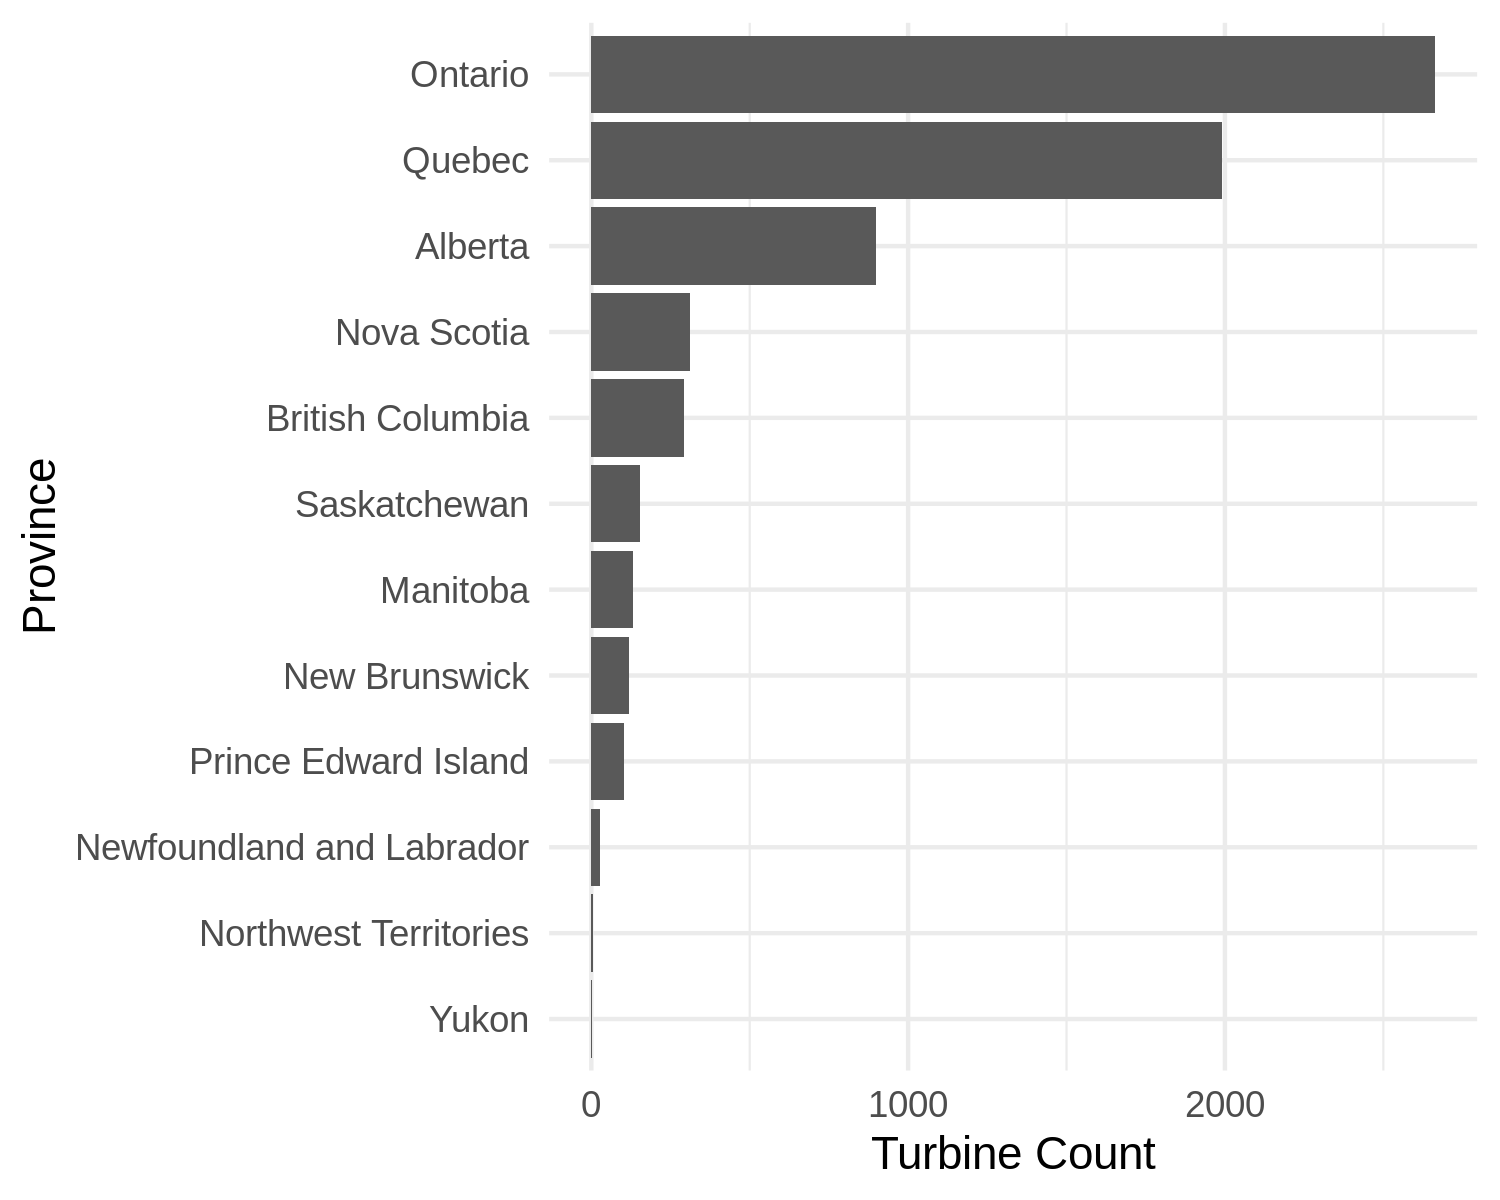

In [2]:
df_sorted = df %>% 
    mutate(province_sorted = province_territory %>% fct_infreq() %>% fct_rev())

p = ggplot(df_sorted, aes(x = province_sorted))

p = p + geom_bar() + coord_flip()

p = p + theme_minimal()

p = p + labs(x = "Province", y = "Turbine Count")

p

Make a bar chart **sorted by frequency** of turbine count per manufacturer. **Group the low frequency manufacturers into an `Other` category**.

**Bonus:** Can you force the `Other` category to be the last bar? 

In [9]:
df_sorted2 = df %>%
        group_by(manufacturer) %>%
        mutate(n = n()) %>%
        ungroup() %>%
        arrange(n) %>%
        mutate(manufacturer_sorted = fct_inorder(manufacturer)) %>%
        mutate(manufacturer_sorted.simple = fct_lump(manufacturer_sorted) %>% fct_relevel('Other'))

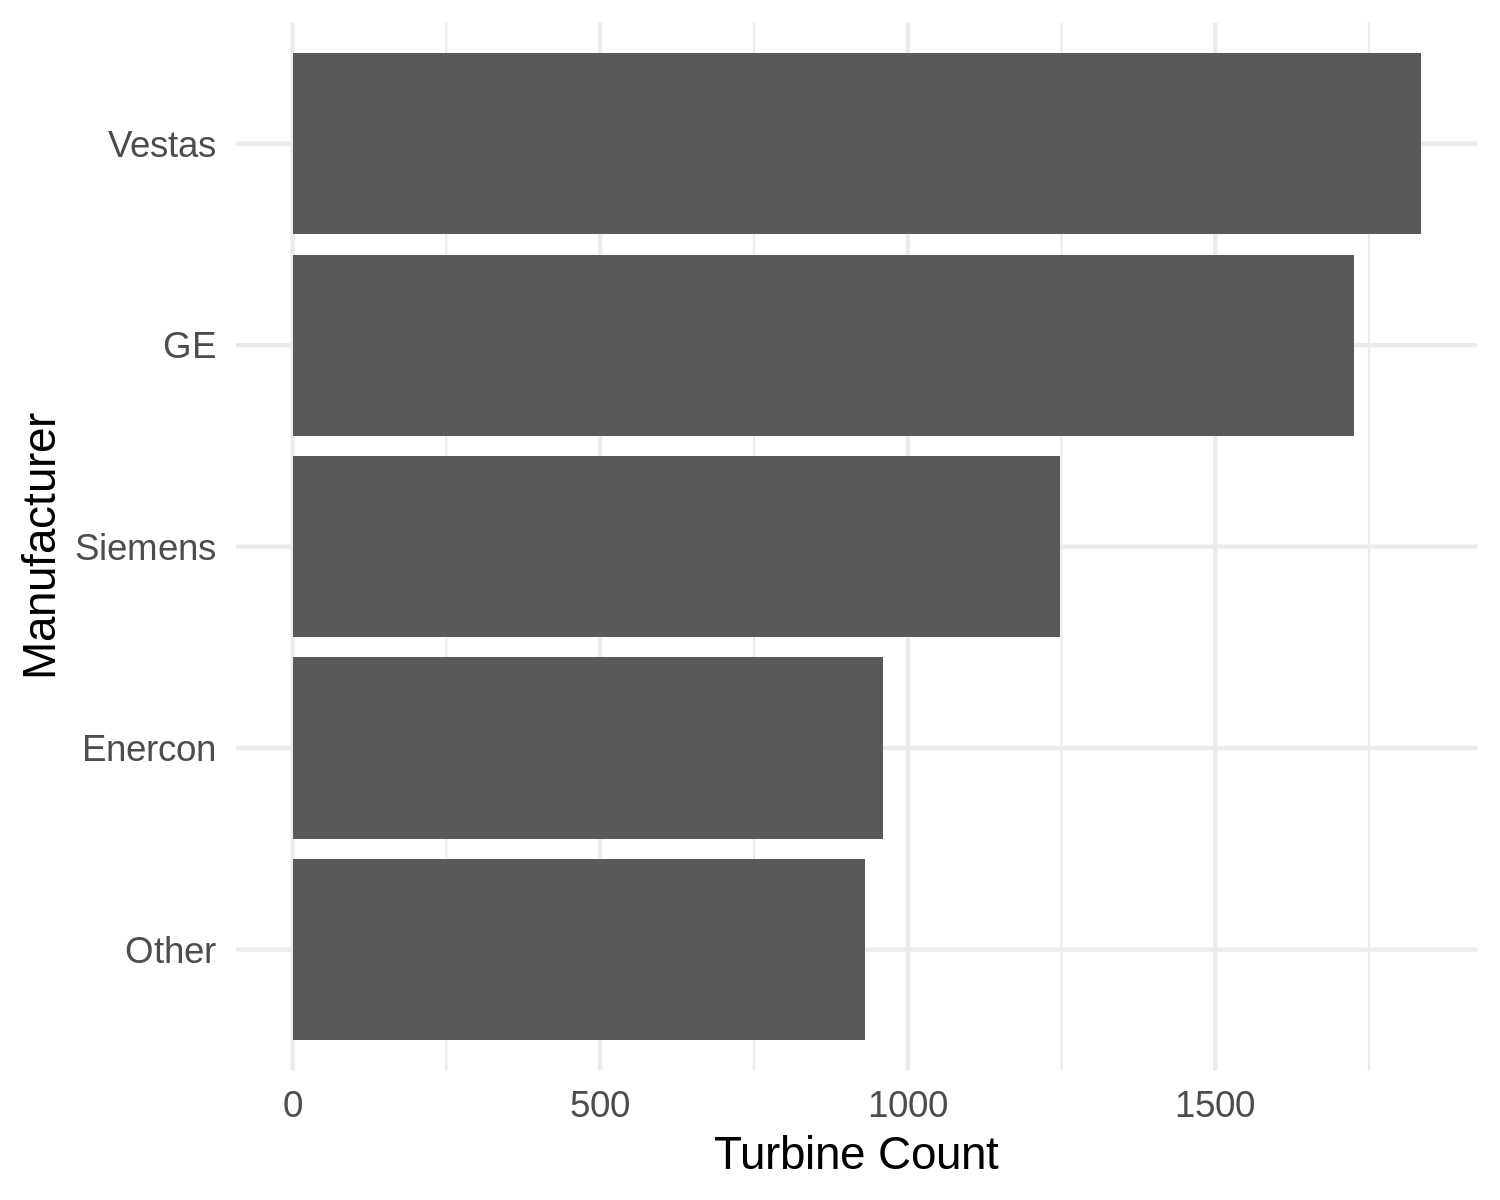

In [10]:
p = ggplot(df_sorted2, aes(x = manufacturer_sorted.simple)) 

p = p + geom_bar() + coord_flip()

p = p + theme_minimal()

p = p + labs(x = "Manufacturer", y = "Turbine Count")

p